In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Position_Salaries.csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


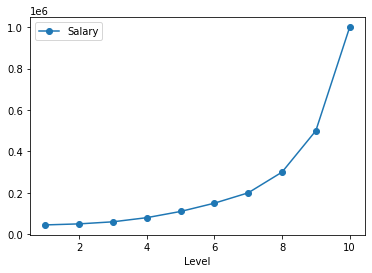

In [152]:

df.plot(kind='line',x='Level',y='Salary',marker='o')
plt.show()

In [14]:
x=df[['Level']]
y=df['Salary']

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [17]:
y_pred=model.predict(x)

In [18]:
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

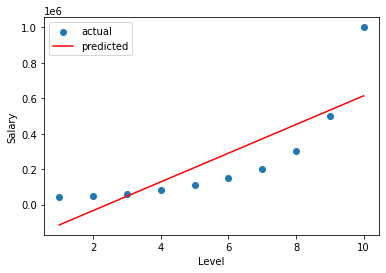

In [25]:
plt.scatter(x,y,label='actual')
plt.plot(x,y_pred,c='r',label='predicted')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend(loc='best')

In [133]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)

In [134]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [135]:
model_poly=LinearRegression()
model_poly.fit(x_poly,y)
y_pred_poly=model_poly.predict(x_poly)

In [136]:
y_pred_poly

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

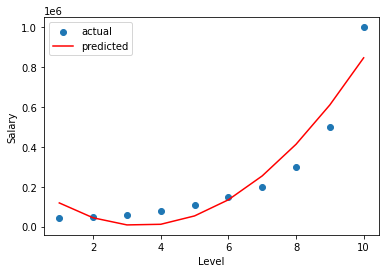

In [137]:
plt.scatter(x,y,label='actual')
plt.plot(x,y_pred_poly,c='r',label='predicted')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend(loc='best')

In [138]:
pred_df=pd.DataFrame({'actual':y,'pred(simple)':y_pred,'pred_poly':y_pred_poly})

In [139]:
pred_df

,actual,pred(simple),pred_poly
0,45000,-114454.545455,118727.272727
1,50000,-33575.757576,44151.515152
2,60000,47303.030303,8439.393939
3,80000,128181.818182,11590.909091
4,110000,209060.606061,53606.060606
5,150000,289939.393939,134484.848485
6,200000,370818.181818,254227.272727
7,300000,451696.969697,412833.333333
8,500000,532575.757576,610303.030303
9,1000000,613454.545455,846636.363636


In [140]:
from sklearn.metrics import r2_score
r2_simple=r2_score(pred_df['actual'],pred_df['pred(simple)'])
r2_poly=r2_score(pred_df['actual'],pred_df['pred_poly'])
print(f'r2 score ->  simple: {r2_simple} poly: {r2_poly} ')

r2 score ->  simple: 0.6690412331929895 poly: 0.9162082221443942 


In [141]:
def adjusted_r2(r2,n,p):
    aj_r2=1-((1-r2)*(n-1)/(n-p-1))
    return aj_r2

In [142]:
adj_r2_simple=adjusted_r2(r2_simple,10,1)
adj_r2_poly=adjusted_r2(r2_poly,10,1)
print(f'adjusted r2 score -> simple: {adj_r2_simple} poly: {adj_r2_poly}')

adjusted r2 score -> simple: 0.6276713873421131 poly: 0.9057342499124436


In [143]:
model_poly.predict(poly.fit_transform([[15]]))[0]

2611257.5757575775

## r2 score manual calculation

In [174]:
def r2(y,y_pred,y_mean):
    rss=((y-y_pred)**2).sum()
    tss=((y-y_mean)**2).sum()
    r2_score = 1-(rss/tss)
    return r2_score
    

In [175]:
y_mean=y.mean()

In [176]:
r2(y,y_pred,y_mean)

0.6690412331929895

In [177]:
r2(y,y_pred_poly,y_mean)

0.9162082221443942